In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('datasets/ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [13]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


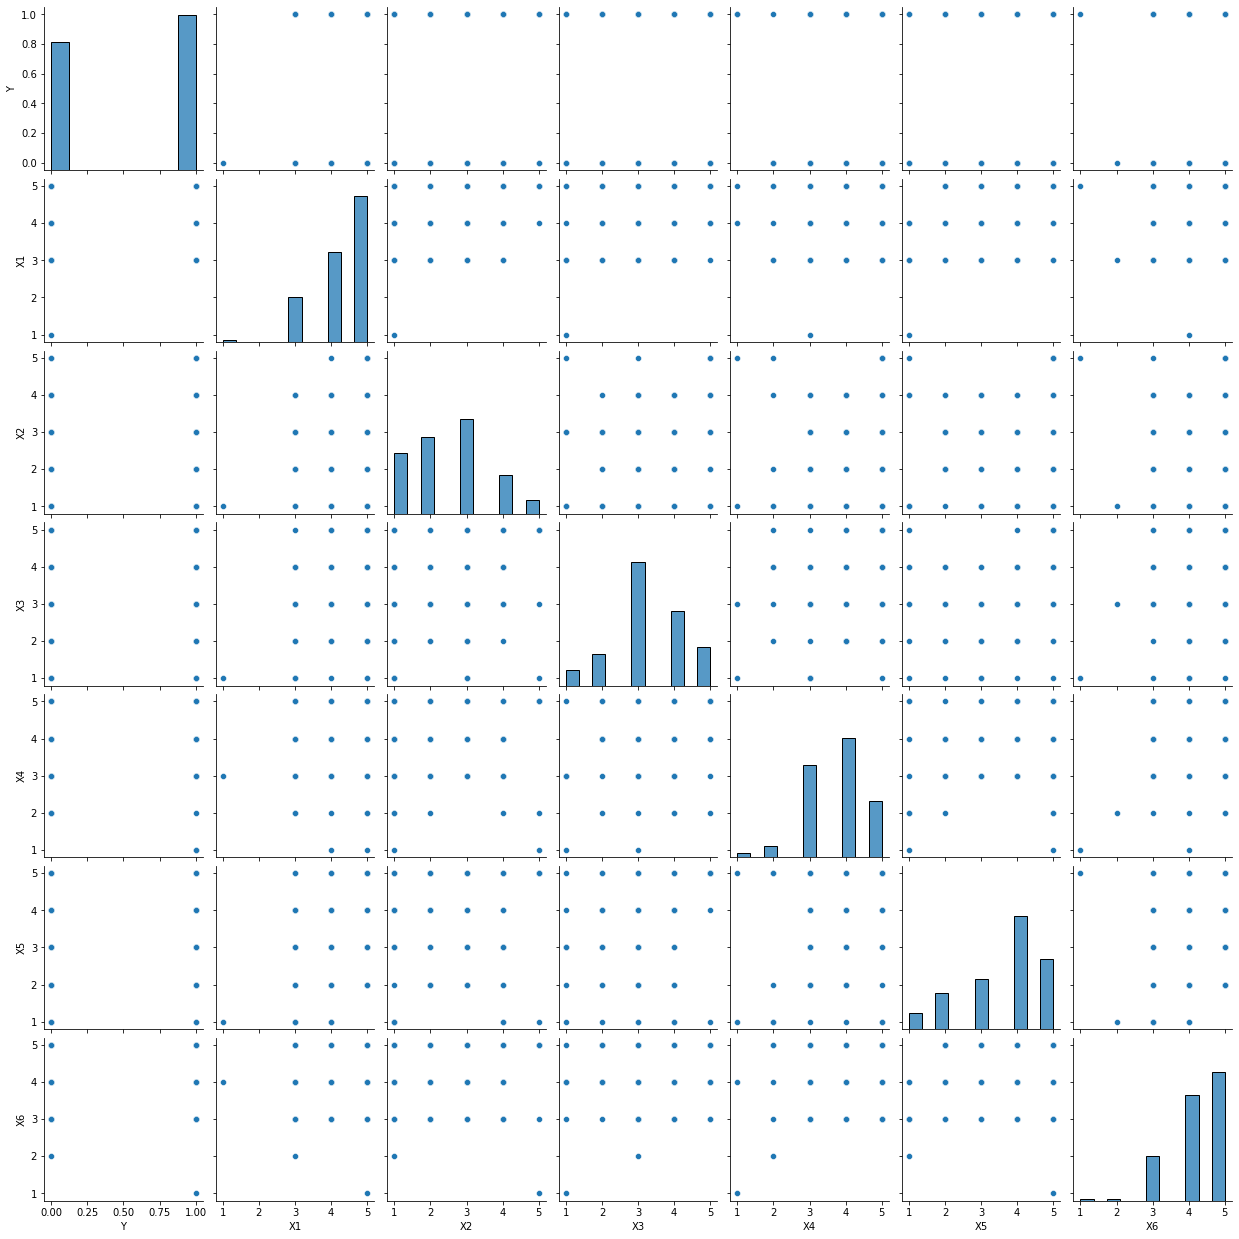

In [12]:
sns.pairplot(df)

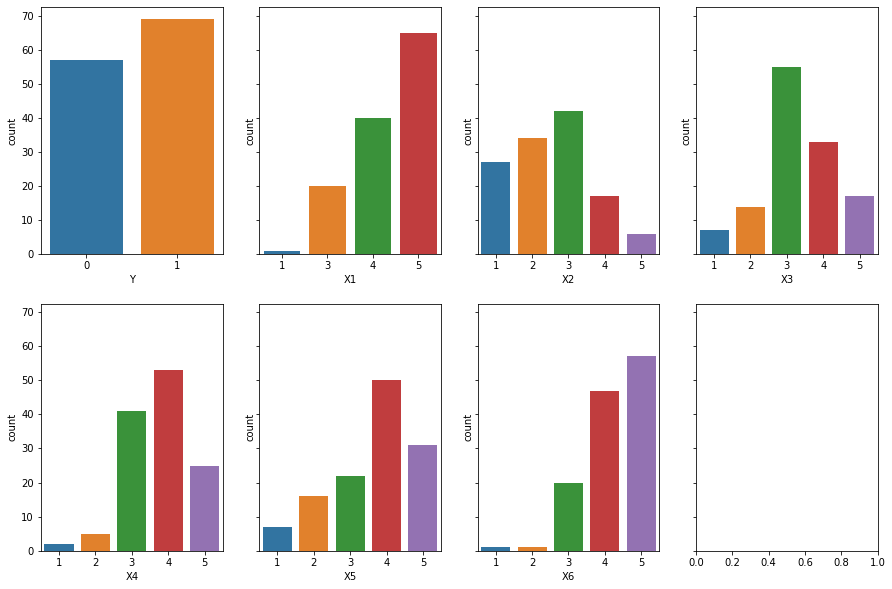

In [26]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, sharey=True, figsize = (15,10))

for col, ax in zip(df.columns, axs.ravel()):
    sns.countplot(x= col, data = df,ax=ax)

<AxesSubplot:>

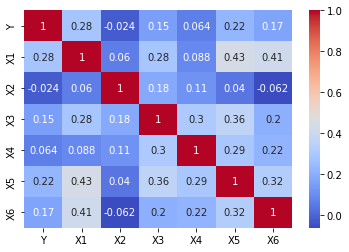

In [27]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

Data looks OK, nothing is missing and distribution looks fair. A liitle more positive results than negatives in label column, but it should work well. Grades are in range 1 to 5, so rang is not too big. Hence, scaling is not required. Data is clean, and can be used right away.

# Splitting the data:

In [38]:
X = df.drop('Y', axis = 1)
y = df[['Y']]

# Chose test size to be 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(f'Train set has {X_train.shape[0]} entries')
print(f'Test set has {X_test.shape[0]} entries')

Train set has 100 entries
Test set has 26 entries


<br>First I am going to use **lazypredict** to run many different classification algorithms to find ones that are best for this case. Then I will run them separately to confirm results from **lazypredict**. Found in [here](https://towardsdatascience.com/how-to-run-30-machine-learning-models-with-2-lines-of-code-d0f94a537e52).

In [39]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clfs = LazyClassifier(verbose = 0, ignore_warnings = True)
models, predictions = clfs.fit(X_train, X_test, y_train, y_test)
print(models)

100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 22.83it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.77               0.80     0.80      0.78   
BernoulliNB                        0.73               0.74     0.74      0.74   
ExtraTreeClassifier                0.77               0.73     0.73      0.77   
CalibratedClassifierCV             0.69               0.67     0.67      0.70   
DecisionTreeClassifier             0.73               0.67     0.67      0.73   
XGBClassifier                      0.73               0.67     0.67      0.73   
ExtraTreesClassifier               0.73               0.67     0.67      0.73   
SVC                                0.73               0.67     0.67      0.73   
RandomForestClassifier             0.73               0.67     0.67      0.73   
LabelPropagation                   0.69               0.64     0.64      0.69   
LabelSpreading              

As we can see from the results above, many models could pass the threshold of 73% accuracy: 
- QuadraticDiscriminantAnalysis
- BernoulliNB
- ExtraTreeClassifier
- DecisionTreeClassifier
- XGBClassifier 
- ExtraTreesClassifier
- SVC   
- RandomForestClassifier

So I will run couple of them myself to test results of lazypredict. In this work I will not try to tune hyperparameters, just run models on default settings:
### Decision Tree

Accuracy score: 0.73

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.79      0.83      0.81        18

    accuracy                           0.73        26
   macro avg       0.68      0.67      0.67        26
weighted avg       0.72      0.73      0.73        26



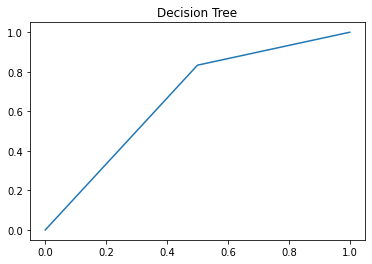

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Decision Tree')
plt.title('Decision Tree')
plt.show()

### Extra Tree

Accuracy score: 0.77

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.83      0.83      0.83        18

    accuracy                           0.77        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.77      0.77      0.77        26



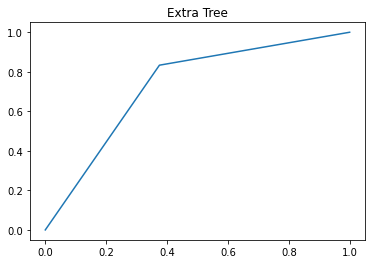

In [71]:
from sklearn.tree import ExtraTreeClassifier

clf = ExtraTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Extra Tree')
plt.title('Extra Tree')
plt.show()

### Random Forest

Accuracy score: 0.73

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.79      0.83      0.81        18

    accuracy                           0.73        26
   macro avg       0.68      0.67      0.67        26
weighted avg       0.72      0.73      0.73        26



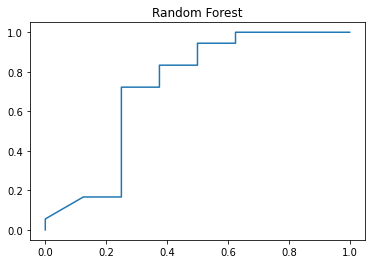

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Random Forest')
plt.title('Random Forest')
plt.show()

### Gradient Boosting

Accuracy score: 0.77

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.80      0.89      0.84        18

    accuracy                           0.77        26
   macro avg       0.73      0.69      0.71        26
weighted avg       0.76      0.77      0.76        26



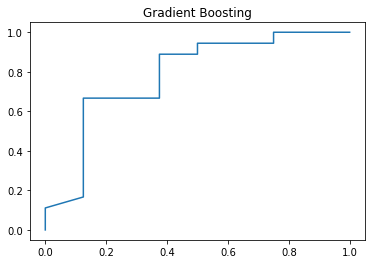

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Gradient Boosting')
plt.title('Gradient Boosting')
plt.show()

### Logistic Regression

Accuracy score: 0.65

Classification report:
               precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.76      0.72      0.74        18

    accuracy                           0.65        26
   macro avg       0.60      0.61      0.61        26
weighted avg       0.67      0.65      0.66        26



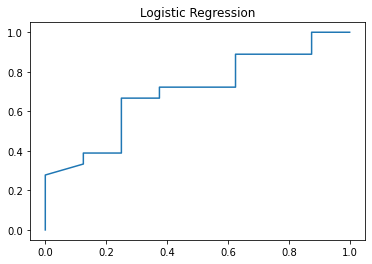

In [73]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.show()

### Support Vector Classification

In [74]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

Accuracy score: 0.73

Classification report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.82      0.78      0.80        18

    accuracy                           0.73        26
   macro avg       0.69      0.70      0.69        26
weighted avg       0.74      0.73      0.73        26



### Quadratic Discriminant Analysis

Accuracy score: 0.77

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.93      0.72      0.81        18

    accuracy                           0.77        26
   macro avg       0.76      0.80      0.76        26
weighted avg       0.82      0.77      0.78        26



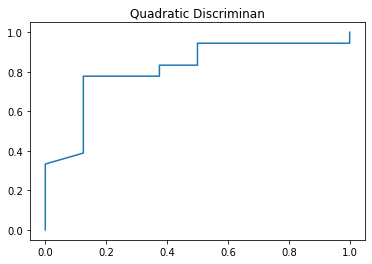

In [75]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: {}\n'.format(round(accuracy_score(y_test, y_pred),2)))
print('Classification report:\n',classification_report(y_test, y_pred))

y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = 'Quadratic Discriminan')
plt.title('Quadratic Discriminan')
plt.show()

# Conclusion

I was given a subset of survey data of a select customer cohort. It consists of responses for different questions regarding the order, and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more satisfaction with service. Also it has target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers. My goal is to predict if a customer is happy or not based on the answers they give to questions asked.

First, exploratory data analysis process was performed. It indicated that the dataset has no null values, and all the values in dataset is in proper range. Correlation heatmap indicated that there is no direct correlation in any of features. As there are no extreme values in dataset, it can be used in training model without additional cleaning.

I used lazypredict package to pick classifiers, as it accelerates process. Results indicated that tree based models fit the best, and I performed further research to confirm findings of lazypredict. I ran some of the models given in result, to confirm it gives same accuracy as was indicated in lazypredict. The best performing model on this dataset was proved to be quadratic discriminant analysis with accuracy score of 0.77. For further improvement of results hyperparameter tuning is recommended.
 